# Examen A Módulo 1 - Optimización.

**Lea cuidadosamente las siguientes indicaciones antes de comenzar el examen:**
- Para resolver el examen edite este mismo archivo y renómbrelo de la siguiente manera: *Examen1_ApellidoNombre*, donde *ApellidoNombre* corresponde a su apellido paterno con la inicial en mayúscula, seguido de su primer nombre con la inicial en mayúscula **sin acentos**. Por ejemplo, en mi caso el nombre del archivo sería *Examen1_MoralesGabriel*.
- Resuelva los puntos en el espacio provisto. Si requiere agregar más celdas para código o escritura, hágalo (`Esc`,`B`) o (`Esc`,`A`).
- Recuerde que también se está evaluando su capacidad de interpretar los resultados. Escriba sus interpretaciones/conclusiones en celdas utilizando *Markdown*.
- El formato de presentación de todo el examen en general debe ser adecuado. Use tamaños de letra, colores, etiquetas, etcétera.
- No se resuelven dudas de ningún tipo por los profesores de la asignatura. Por favor, absténgase de preguntar.
- Revise bien el tipo de examen. Sólo se le calificará si realiza el tipo de examen asignado.

In [1]:
import sympy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.optimize as opt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
# Primer punto. Optimización de funciones con `SymPy` (37 puntos)

**Costo mínimo**. Imagine dos contenedores cilíndricos sin tapa que deben satisfacer las siguientes condiciones:

- El primer contenedor tiene el doble de altura que el segundo.
- La altura del primer contenedor (el de mayor tamaño) es el doble de su radio.
- El material para la base cuesta 10.00 MXN por cada $m^2$.
- El material para los lados cuesta 6.00 MXN por cada $m^2$.

¿Cuál es el costo del contenedor más barato?


1. Escriba el volumen $V_1(r_1)$ y $V_2(r_2, r_1)$ de ambos contenedores como dos funciones distintas, donde $r_1$ es el radio del primer contenedor y $r_2$ es el radio del segundo. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$$ V_1(r_1) = \pi*r_1^2*2*r_1 = 2*\pi*r_1^3 $$

$$ V_2(r_2,r_1) = \pi*r_2^2*r_1 $$


2. Escriba el costo **C** de fabricar ambos contenedores como una función de los radios de las bases. Realice este punto usando $\LaTeX$ y celdas *Markdown*.

$$ c_1 = (10*\pi*r_1^2) + (6*2*\pi*r_1*2*r_1) = (10*\pi*r_1^2) + (24*\pi*r_1^2)$$

$$ c_2 = (10*\pi*r_2^2) + (6*2*\pi*r_2*r_1) = (10*\pi*r_2^2) + (12*\pi*r_1*r_2) $$

$$ c_T = (10*\pi*r_1^2) + (24*\pi*r_1^2) + (10*\pi*r_2^2) + (12*\pi*r_1*r_2) $$
$$ = 10*((\pi*r_1^2) + (\pi*r_2^2)) + 6*((4*\pi*r_1^2) + (2*\pi*r_1*r_2)) $$


3. Determina las dimensiones de los contenedores si el volumen del contenedor pequeño debe ser de $12m^3$ y el costo debe ser mínimo.

In [2]:
sp.var("x")
sp.var("y")

V2 = sp.pi * y**2 * x - 12
x_desp = sp.solve(V2, x)[0]
x_desp

12/(pi*y**2)

In [3]:
CT = 10 * ((sp.pi * x**2) + (sp.pi * y**2)) + 6 * ((4 * sp.pi * x**2) + (2 * sp.pi * x * y))

CT_sust = CT.subs(x, x_desp)
CT_sust

10*pi*y**2 + 144/y + 4896/(pi*y**4)

In [4]:
def CT(y):
    return (10 * sp.pi * y**2) + (144 / y) + (4896 / (sp.pi * y**4))

dCT = sp.diff(CT(y), y)
pc = sp.solve(dCT, y)
pc

[-5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)),
 5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)),
 5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 5**(2/3)*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(-18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 -5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) - sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)),
 -5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3)) + sqrt(3)*5**(2/3)*I*(18 + 6*sqrt(689))**(1/3)/(10*pi**(1/3))]

In [5]:
ddCT = sp.diff(dCT, y)
ddCT

20*pi + 288/y**3 + 97920/(pi*y**6)

In [6]:
crit_2da_derivada = ddCT.subs(y, pc[1])

if crit_2da_derivada < 0:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y es un máximo")
elif crit_2da_derivada > 0:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y es un mínimo")
else:
    print("El punto crítico se encuentra en " + str(pc[1]) + " y no se puede definir por criterio de la segunda derivada si es un máximo o un mínimo")

El punto crítico se encuentra en 5**(2/3)*(18 + 6*sqrt(689))**(1/3)/(5*pi**(1/3)) y es un mínimo


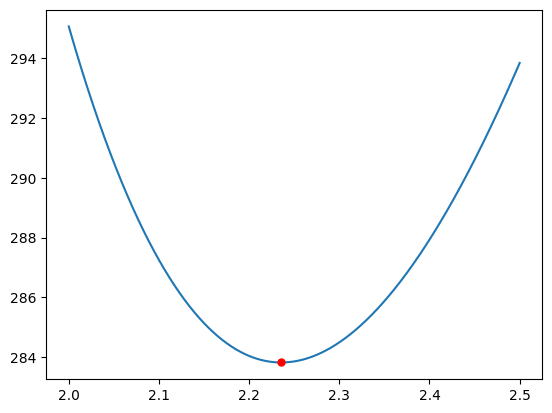

In [7]:
xn = np.linspace(2, 2.5, 1000)

plt.figure()
plt.plot(xn, CT(xn))
plt.plot(pc[1], CT(pc[1]), ".r", ms=10)

In [8]:
y_val = pc[1]

x_val = x_desp.subs(y, y_val)

print("Los cilindros deben de tener medidas de r1 = " + str(float(x_val)) + " y r2 = " + str(float(y_val)))

Los cilindros deben de tener medidas de r1 = 0.7643137311179903 y r2 = 2.235526671726874


3. ¿Cuál fue el costo de fabricar este par de contenedores?

In [9]:
print("El costo de fabricar ambos contenedores es de $" + str(float(CT(y_val))))

El costo de fabricar ambos contenedores es de $283.8161489938861


##### ***Me equivoqué en no hacer el problema. Creo que el pleamiento del problema era bastante confuso, y me llevó bastante tiempo analizarlo, para decidir que lo iba a dejar para despues, cuando realmente no tuve más tiempo después porque me atoré con el último problema. Lo que debería de hacer es no tardarme tanto con el análisis de los problemas. Si no se como hacerlo me salto al siguiente y al final vuelvo a ese.**

---
# Segundo punto. Programación lineal (37 puntos)

Una empresa se dedica a fabricar tarjetas de control para automóviles, y están en su momento de planeación de compras anuales. Hay 5 proveedores que pueden proveer los componentes, cada uno a su propio precio.

<table>
  <tr>
      <th>  </th>
      <th>Proveedor 1</th>
      <th>Proveedor 2</th>
      <th>Proveedor 3</th>
      <th>Demanda</th>
  </tr>
  <tr>
      <th>Componente 1</th>
      <td>0.5</td>
      <td>0.6</td>
      <td>0.7</td>
      <td>15000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 2</th>
      <td>0.7</td>
      <td>0.5</td>
      <td>0.6</td>
      <td>20000</td>
  </tr>
  <tr style="border-bottom: 1px solid #000;">
      <th>Componente 3</th>
      <td>0.32</td>
      <td>0.54</td>
      <td>0.8</td>
      <td>12000</td>
  </tr>

  <tr style="border-bottom: 1px solid #000;">
      <th>Capacidad</th>
      <td> 21000 </td>
      <td> 16000 </td>
      <td> 16000 </td>
      <td>  </td>
  </tr>
</table>

El proveedor tiene restricciones de capacidad de fabricación del tipo de componentes, por lo que un proveedor no puede satisfacer nuestra demanda completa para cada componente.

Se desea conocer la cantidad que se debe comprar de cada componente a cada proveedor para gastar la menor cantidad de dinero posible, pero al mismo tiempo lograr satisfacer la demanda para poder continuar con la manufactura del producto.

1. Escriba la función a **minimizar** junto con las restricciones, explicando detalladamente cada paso (usando fórmulas en $\LaTeX$, en celdas Markdown). Además escriba el problema en la forma \begin{equation}
\begin{array}{ll}
\min_{\boldsymbol{x}} & \boldsymbol{c}^T\boldsymbol{x} \\
\text{s. a. }        & \boldsymbol{A}_{eq}\boldsymbol{x}=\boldsymbol{b}_{eq} \\
                     & \boldsymbol{A}\boldsymbol{x}\leq\boldsymbol{b},
\end{array}\qquad\text{(23 puntos)}
\end{equation}

1. Criterio de optimización
    - Minimizar
2. Variables sobre las cuales tengo control
    - $x_1:$ Cantidad a surtir de provedor 1 sobre componente 1
    - $x_2:$ Cantidad a surtir de provedor 1 sobre componente 2
    - $x_3:$ Cantidad a surtir de provedor 1 sobre componente 3
    - $x_4:$ Cantidad a surtir de provedor 2 sobre componente 1
    - $x_5:$ Cantidad a surtir de provedor 2 sobre componente 2
    - $x_6:$ Cantidad a surtir de provedor 2 sobre componente 3
    - $x_7:$ Cantidad a surtir de provedor 3 sobre componente 1
    - $x_8:$ Cantidad a surtir de provedor 3 sobre componente 2
    - $x_9:$ Cantidad a surtir de provedor 3 sobre componente 3
3. Función de costos
$$ 0.5x_1 +  0.7x_2 + 0.32x_3 + 0.6x_4 + 0.5x_5 + 0.54x_6 + 0.7x_7  + 0.6x_8 + 0.8x_9 = costo $$
4. Restricciones
    - Capacidad de abasto provedor 1
        - $ 1x_1 +  1x_2 + 1x_3 + 0x_4 + 0x_5 + 0x_6 + 0x_7  + 0x_8 + 0x_9 \leq 21000 $
    - Capacidad de abasto provedor 2
        - $ 0x_1 +  0x_2 + 0x_3 + 1x_4 + 1x_5 + 1x_6 + 0x_7  + 0x_8 + 0x_9 \leq 16000 $
    - Capacidad de abasto provedor 3
        - $ 0x_1 +  0x_2 + 0x_3 + 0x_4 + 0x_5 + 0x_6 + 1x_7  + 1x_8 + 1x_9 \leq 16000 $
    - Demanda de componente 1
        - $ 1x_1 +  0x_2 + 0x_3 + 1x_4 + 0x_5 + 0x_6 + 1x_7  + 0x_8 + 0x_9 = 15000 $
    - Demanda de componente 2
        - $ 0x_1 +  1x_2 + 0x_3 + 0x_4 + 1x_5 + 0x_6 + 0x_7  + 1x_8 + 0x_9 = 20000 $
    - Demanda de componente 3
        - $ 0x_1 +  0x_2 + 1x_3 + 0x_4 + 0x_5 + 1x_6 + 0x_7  + 0x_8 + 1x_9 = 12000 $

2. Resuelva el problema utilizando la función `linprog`. ¿Cómo debe ser la distribución de compras? ¿Cuánto dinero se necesita para satisfacer la demanda? (10 puntos)

In [10]:
c = np.array([0.50,
              0.70,
              0.32,
              0.60,
              0.50,
              0.54,
              0.70,
              0.60,
              8.80])

Aub = np.array([
    [1, 1, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 1, 1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 1, 1, 1]
])

Aeq = np.array([
    [1, 0, 0, 1, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 1, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 1, 0, 0, 1]
])

bub = np.array([21000,
                16000,
                16000])

beq = np.array([15000,
                20000,
                12000])

res = opt.linprog(c, Aub, bub, Aeq, beq)
res.x

array([ 9000.,     0., 12000.,     0., 16000.,     0.,  6000.,  4000.,
           0.])

In [23]:
res.fun

22940.0

Se necesitan:

- 9000 componentes 1 del productor 1
- 12000 componentes 3 del productor 1
- 16000 componentes 2 del productor 2
- 6000 componentes 1 del productor 3
- 4000 componentes 2 del productor 3
- $\$22,940$ para sattizfacer la demanda

##### ***Me faltó escribir la cantidad de dinero necesaria para satisfacer la demanda. No leí bien las instrucciones por la prisa del examen.**

# Tercer punto. Ajuste de curvas (36 puntos)

Utiliza el archivo adjunto en Canvas en el apartado que corresponde al examen.

Escribe tu número de expediente:

745345

Lee el archivo y extrae la siguiente información:
- $x$ es la primer columna del archivo
- $y$ es la columna correspondiente a los últimos dos dígitos de tu número de expediente + 1. E.g. mi expediente es $693871$; por lo tanto, debo usar la columna $72$.

In [11]:
data_path = '/content/drive/MyDrive/Colab Notebooks/Simulación matemática/Optimización/Examen/'
data = pd.read_excel(data_path + 'E01-RegresionLineal.xlsx')
data

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,0.000000,4.983091,3.769339,5.594828,6.429803,4.511528,6.706383,2.911751,-2.864652,-3.093433,...,6.667738,5.885562,-2.052453,-2.984045,5.750429,2.135754,-1.234049,3.500585,3.206284,-2.015092
1,0.002002,3.614394,2.396633,4.225133,5.058559,3.141485,5.346220,1.538843,-4.236502,-4.464649,...,5.312463,4.525002,-3.410375,-4.346935,4.396159,0.773647,-2.607035,2.130640,1.840478,-3.376963
2,0.004004,4.188195,2.966396,4.797931,5.629813,3.713902,5.928572,2.108423,-3.665847,-3.893386,...,5.899704,5.106895,-2.825807,-3.767381,4.984377,1.354042,-2.037531,2.703165,2.417138,-2.796368
3,0.006006,5.445592,4.219727,6.054320,6.884664,4.969878,7.194535,3.361588,-2.411586,-2.638543,...,7.170558,6.372337,-1.557653,-2.504284,6.256181,2.618039,-0.784438,3.959257,3.677362,-1.532206
4,0.008008,5.067521,3.837561,5.675236,6.504048,4.590350,6.825046,2.979275,-2.792786,-3.019186,...,6.805961,6.002265,-1.924977,-2.876709,5.892506,2.246572,-1.166821,3.579851,3.302087,-1.903542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.991992,-37.621743,-26.216957,2.179613,34.525805,-81.587062,44.262737,22.788572,58.082286,-69.526880,...,-57.907315,-30.282534,2.509291,-114.436776,14.101042,109.678623,11.649459,0.666863,27.882475,93.843512
996,1.993994,-38.413531,-26.940495,1.526510,34.067619,-82.481098,43.789529,22.302350,57.727557,-70.383159,...,-58.823098,-31.021199,1.898045,-115.441524,13.503160,109.438779,11.124500,0.086051,27.430621,93.598580
997,1.995996,-38.302053,-26.760562,1.777022,34.513839,-82.472001,44.220604,22.720442,58.277463,-70.336305,...,-58.835998,-30.856352,2.190637,-115.543472,13.809172,110.103751,11.503708,0.409258,27.883253,94.258542
998,1.997998,-39.725567,-28.115414,0.492894,33.426211,-83.998028,43.117706,21.604596,57.293749,-71.824574,...,-60.384272,-32.226251,0.948811,-117.180880,12.580823,109.235287,10.348831,-0.801770,26.802116,93.385145


In [12]:
m = len(data)
x = data[0].to_numpy()
y = data[46]

data_array_y = data[46].to_numpy()

1. Ajuste los datos con polinomios de grados 1, 3, y 5. Muestre los errores de forma gráfica. ¿Qué polinomio se ajusta mejor?

In [13]:
def funcion_de_costo(beta, X, y):
    m, n = X.shape
    beta = np.reshape(beta, [n, 1])
    y_pred = X @ beta
    error = y_pred - y
    return (error.T @ error)[0][0]

#lineal = b0 + b1*x
beta = np.random.rand(2)
ones = np.ones([m, 1])
x_factor = np.reshape(x, [m, 1])
X = np.hstack( (ones, x_factor) )
y_vector = np.reshape(data_array_y, [m, 1])
sol1 = opt.minimize(funcion_de_costo, beta, args=(X, y_vector))

#cuadrática = b0 + b1*x + b2*x**2
beta = np.random.rand(3)
x2_factor = np.reshape(x**2, [m, 1])
X2 = np.hstack( (ones, x_factor, x2_factor) )
sol2 = opt.minimize(funcion_de_costo, beta, args=(X2, y_vector))

#cúbica = b0 + b1*x + b2*x**2 + b3*x**3
beta = np.random.rand(4)
x3_factor = np.reshape(x**3, [m, 1])
X3 = np.hstack( (ones, x_factor, x2_factor, x3_factor) )
sol3 = opt.minimize(funcion_de_costo, beta, args=(X3, y_vector))

#cuarta = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4
beta = np.random.rand(5)
x4_factor = np.reshape(x**4, [m, 1])
X4 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor) )
sol4 = opt.minimize(funcion_de_costo, beta, args=(X4, y_vector))

#quinta = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5
beta = np.random.rand(6)
x5_factor = np.reshape(x**5, [m, 1])
X5 = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor) )
sol5 = opt.minimize(funcion_de_costo, beta, args=(X5, y_vector))

<BarContainer object of 3 artists>

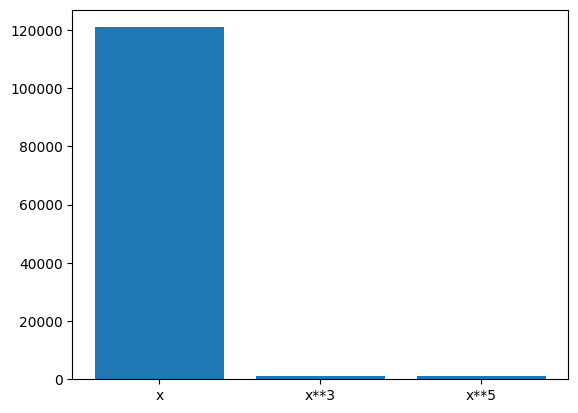

In [14]:
x_label = [1, 2, 3]
y_label = [sol1.fun, sol3.fun, sol5.fun]
etiquetas = ["x", "x**3", "x**5"]

fig, ax = plt.subplots()
ax.bar(x = x_label, height = y_label, tick_label = etiquetas)

In [15]:
print("Se ajusta mejor con el polinomio de grado 5, ya que unicamente tiene un error de "+ str(sol5.fun) + " en comparacion con los errores de polinomios \nde grado 1 y 3, "+ str(sol1.fun) + " y " + str(sol3.fun) + " respectivamente")

Se ajusta mejor con el polinomio de grado 5, ya que unicamente tiene un error de 964.21616197335 en comparacion con los errores de polinomios 
de grado 1 y 3, 120925.08408810687 y 1023.8468194045411 respectivamente


2. Muestre en un gráfico los datos y el polinomio que mejor se ajuste.

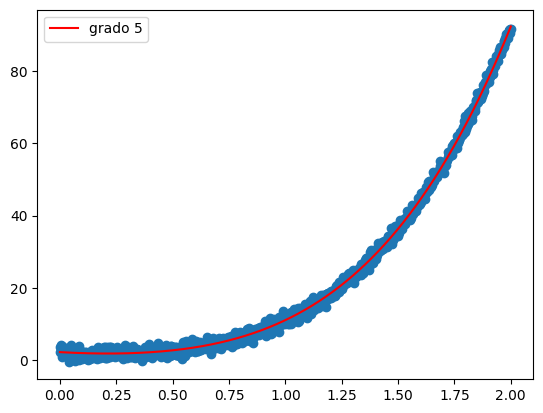

In [16]:
def f5(x):
    return sol5.x[0] + sol5.x[1]*x + sol5.x[2]*x**2 + sol5.x[3]*x**3 + sol5.x[4]*x**4 + sol5.x[5]*x**5

plt.figure()
plt.scatter(x, y)
plt.plot(x, f5(x), "r", label = "grado 5")
plt.legend(loc = "best")

3. Use el modelo para averiguar el valor de $y$ cuando:
- $x=0.001$
- $x=-0.1$
- $x=2.1$

In [17]:
f5(0.001)

2.132080470844751

In [18]:
f5(-0.1)

2.5629617053849554

In [19]:
f5(2.1)

108.84924822034577

4. ¿Qué diferencias encuentra en cuanto a la interpolación y la extrapolación?

Son muy parecidos los valores en y evaluados en 0.001 y -0.01, mientras que en 2.1 se aleja bastante. Unicamente el punto evaluado en 0.001 es una interpolación, mientras que los otros 2 son una extrapolación, es decir están prediciendo como se vería un punto en ese lugar si es que lo hubiera.

5. Agregue un factor $\cos{(10x)}$ a su modelo y grafique los resultados. ¿Mejoró el resultado?

In [20]:
#quinta con coseno = b0 + b1*x + b2*x**2 + b3*x**3 + b4*x**4 + b5*x**5 + cos(10*x)
beta = np.random.rand(7)
cos_factor = np.reshape(np.cos(10*x), [m, 1])
X_cos = np.hstack( (ones, x_factor, x2_factor, x3_factor, x4_factor, x5_factor, cos_factor) )
sol5_c = opt.minimize(funcion_de_costo, beta, args=(X_cos, y_vector))

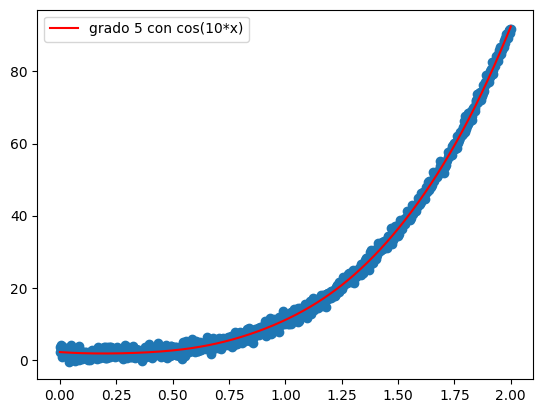

In [21]:
def f5_c(x):
    return sol5_c.x[0] + sol5_c.x[1]*x + sol5_c.x[2]*x**2 + sol5_c.x[3]*x**3 + sol5_c.x[4]*x**4 + sol5_c.x[5]*x**5 + sol5_c.x[6]*np.cos(10*x)

plt.figure()
plt.scatter(x, y)
plt.plot(x, f5_c(x), "r", label = "grado 5 con cos(10*x)")
plt.legend(loc = "best")

In [22]:
print("Si mejora el ajuste, con un error de "+ str(sol5_c.fun) + " en comparación con el error de " + str(sol5.fun) + " del polinomio de grado 5")

Si mejora el ajuste, con un error de 962.6564344436051 en comparación con el error de 964.21616197335 del polinomio de grado 5


##### ***Corregí el nombre de la función en la gráfica, y reinterpreté la explicación sobre el ajuste del polinomio. Fallé en la administración del tiempo, por lo que no pude escribirlo de la manera adecuada.**